> ### EEE2020-04: Data Structures & Algorithms

# Assignment \# IV: Searching & Sorting

**<div style="text-align: right"> Due date: June 3, 2019. </div>** 
**<div style="text-align: right"> Please upload your file @ yscec by 9 PM. </div>** 
<div style="text-align: right"> Youngmin Oh(오영민): <a href="mailto:youngmin.oh@yonsei.ac.kr">youngmin.oh@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Sanghoon Lee(이상훈): <a href="mailto:sanghslee@yonsei.ac.kr">sanghslee@yonsei.ac.kr</a> </div>

-------------------------------


### *Assignment Instructions:*
1. Write a program implementing a particular algorithm to solve a given problem.
2. You can use both Korean and English for your report.
3. **Analyze the algorithm, theoretically and empirically.** 
4. **Report your results.**  
5. <span style="color:red">**DO NOT**</span> alter **any** sanity check codes.  
    - You must do assignments and labs yourself. 
    - <span style="color:red">**Do not copy any part of your friends’ code.**</span>
    - Otherwise, you will get a F grade.

-----------------

<h2><span style="color:blue">[2018142059] [김서영]</span> </h2>

In [7]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2019-05-28 14:55:52.803461


-------------------------------

### PROBLEM I: Hashing (30 Points)

Implement $\texttt{ChainHashTable}$ using basic $\texttt{List}$ .

> As mentioned in our Lecture notes,  
> (vanilla)HashTable requires <U>reshash technique</U> to prevent **collision** between items that have identical hash value(s).
>
> $\texttt{ChainHashTable}$ settles collision by allowing multiple items be carried in a single slot, namely **'Chaining'**.  
> Details can be found in our Lecture Note 10 p.47(collision), p.58-61(chaining).  

Specifically, we will exploit basic $\texttt{List}$ to implement $\texttt{ChainHashTable}$ in this problem.  

Inputs and outputs of $\texttt{ChainHashTable}$ are specified as follows:  
* <code>init()</code>: constructs an empty HashTable.
* <code>put(key, data)</code>: puts data in HashTable according to its given key value (and returns nothing).
* <code>hash_function(key, slot_size)</code>: returns hash value of given key value.
* <code>get(key)</code>: returns <U>all</U> data stored in HashTable under given key value.
* <code>\_\_len\_\_()</code>: returns total number of data in HashTable.
* <code>\_\_contains\_\_(data)</code>: returns boolean value indicating whether 'data' is in HashTable.
* <code>remove(data)</code>: deletes the data in HashTable (only if it exists).


> Additional Instructions and Tips:
> * When a new item is assigned to a slot, the <U>**latest**</U> item should be at the <U>**front**</U> of the list under its <code>key</code> value.
> * We will overload <code>\_\_contains\_\_</code> method in order to use <code>in</code>.  
> * Note that there is no 'slots' in $\texttt{ChainHashTable}$. 
> * You may assume that <code>key</code> value is always <code>int</code> type.

> For further study, refer to [HERE](https://ratsgo.github.io/data%20structure&algorithm/2017/10/25/hash/) for additional explanation about **Collision** and **Chaining**.

### Answer:

In [1]:
class ChainHashTable:
    def __init__(self, size=10):
        self.size = size
        self.table = [None for i in range(size)]
            
    def put(self, key, data):
        n=self.hash_function(key, self.size)
        
        if self.table[n]==None:
            self.table[n]=[]
        self.table[n].insert(0,data)
        
    def hash_function(self, key, size):
        return key%size

    def get(self, key):
        return self.table[key]
    
    def __len__(self):
        cnt=0
        for i in range(self.size):
            if self.table[i]!=None:
                cnt=cnt+len(self.table[i])
        return cnt
    
    def __contains__(self, data):
        found=False
        for i in range(self.size):
            if self.table[i]!=None:
                for j in self.table[i]:
                    if j==data:
                        found=True
        return found
               
    def remove(self, data):
        found=False
        for i in range(self.size):
            if self.table[i]!=None:
                for j in self.table[i]:
                    if j==data:
                        found=True
                if found==True:
                    self.table[i].remove(data)
                    break

    def __getitem__(self, key):
        return self.get(key)
                   
    def __setitem__(self, key, data): 
        self.put(key, data)
        

In [2]:
### sanity check code ###
h = ChainHashTable()

h[57] = 'nike'; h[1] = 'horse'; h[42] = 'lion'; h[121] = 'zebra'; h[51] = 'giraffe'; h[2] = 'cat'; h[152] = 'jaguar'; h[44] = 'bentley'; h[94] = 'jaguar'
h[3] = 'dog'; h[5213] = 'retriever'; h[43] = 'maltese'; h[7] = 'sports'; h[4] = 'car'; h[64] = 'porsche'; h[97] = 'adidas'

print('-----------sanity check-------------')
print('')

print(h.table)
print('check hash function(9):',h.hash_function(19, 10))
print('length of h(16):', len(h))
print('True:', 'bentley' in h)
print('False:', 'puma' in h)
h.remove('bentley')
h.remove('maltese')
print(h.table)
print('length of h(14):', len(h))
print('True:', 'porsche' in h)
print('True:', 'jaguar' in h)
print('False:', 'puma' in h)

-----------sanity check-------------

[None, ['giraffe', 'zebra', 'horse'], ['jaguar', 'cat', 'lion'], ['maltese', 'retriever', 'dog'], ['porsche', 'car', 'jaguar', 'bentley'], None, None, ['adidas', 'sports', 'nike'], None, None]
check hash function(9): 9
length of h(16): 16
True: True
False: False
[None, ['giraffe', 'zebra', 'horse'], ['jaguar', 'cat', 'lion'], ['retriever', 'dog'], ['porsche', 'car', 'jaguar'], None, None, ['adidas', 'sports', 'nike'], None, None]
length of h(14): 14
True: True
True: True
False: False


### Description:

* ChainHashTable
    * init (초기화)
        * size값을 지정받는다.
        * self.table: 모든 요소가 None인 self.size로 지정된 size의 list
    * put
        * key값과 data값을 받는다.
        * self.hash_function을 사용해서 key값을 들어갈 hash의 값으로 변환한다.
        * 만약 들어갈 hash가 요소가 없어 None이라면, 빈 list를 새로 만든다.
        * hash의 list에 data를 insert로 제일 앞에 넣는다.
    * hash_function
        * key값을 hash값으로 변환한다.
    * get
        * 주어진 key값 하에 있는 모든 data를 return한다.
    * len
        * hash function에 들은 모든 data의 수를 세서 return한다.
        * hash의 list의 길이를 거듭해서 더한다.
    * contains
        * table 내에 입력받은 data를 갖는 요소가 있는지 확인한다.
    * remove
        * 입력받은 요소를 찾아 이를 삭제한다.
    
    
    
    
    

-----------------

### PROBLEM II: Sorting I (30 Points)

Suppose you are now a data scientist and given $\underline{N}$ points in a 2-D Cartesian Coordinate System from your experiment. 
<br>
<br>
To analyze this data, You want to SORT them in $\texttt{ascending}$ order of 'X' coordinates.
If there are the same 'X' coordinates points, You dicide to sort them in $\texttt{desending}$ order of 'Y' coordinates.
> For example, given (0,1) , (1, 2) , (-3, 5) , (0, 11)
$\rightarrow$ (-3, 5) , (0, 11) , (0, 1) , (1, 2)


<br>
<br>

To this end,
- Implement $\texttt{(1) Bubble Sort}$ , $\texttt{(2) Insertion Sort}$ and $\texttt{(3) Merge Sort}$
- Compare their $\texttt{Complexity}$ by plotting the graphs $\underline{Elapsed\;time}$ versus $\underline{N}$ 
- Discuss your results

<br>
$\mathbf{NOTICE}$ : Do Not Use any pre-built Sorting Library. ( e.g. sorted() or numpy.sort() ) 

### Answer:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

class Sorting():
    def __init__(self):
        pass
    def __gen_coords__(self, N=10):
        return np.random.randint(-N,N,(N,2))
    def bubble_sort(self, coords):
        for i in range(coords.size//2-1,0,-1):
            for j in range (i):
                if coords[j][0] > coords[j + 1][0]:
                    for k in range(2):
                        temp = coords[j][k]
                        coords[j][k] = coords[j + 1][k]
                        coords[j + 1][k] = temp
                elif coords[j][0]==coords[j+1][0]:
                    if coords[j][1]<coords[j+1][1]:
                        temp = coords[j+1][1]
                        coords[j+1][1] = coords[j][1]
                        coords[j][1] = temp
        return coords
    def insert_sort(self, coords):
        for i in range(coords.size//2):
            fin=False
            current0=coords[i][0]
            current1=coords[i][1]
            position=i
            while position>0 and coords[position-1][0]>=current0:
                if coords[position-1][0]>current0:
                    for k in range(2):
                        coords[position][k] = coords[position - 1][k]
                    
                elif coords[position-1][0]==current0 and coords[position-1][1]<current1:
                        coords[position][1] = coords[position - 1][1]
                else:
                    fin=True
                    break
                position=position-1
            coords[position][0]=current0
            coords[position][1]=current1
        return coords
    def merge_sort(self, coords): 
        if (coords.size//2) > 1:
            mid = (coords.size//2) // 2
            left_half = coords[:mid]
            right_half = coords[mid:]            
            self.merge_sort(left_half)
            self.merge_sort(right_half)
            lc=left_half.copy()
            rc=right_half.copy()
        
            i=0 
            j=0 
            k=0
        
            while i < (left_half.size//2) and j < (right_half.size//2): 
                if lc[i][0] < rc[j][0]:
                    coords[k][0] = lc[i][0]
                    coords[k][1] = lc[i][1]
                    i=i+1
                
                elif lc[i][0]==rc[j][0]:
                    if lc[i][1]>rc[j][1]:
                        coords[k][0] = lc[i][0]
                        coords[k][1] = lc[i][1]
                        i=i+1
                    else:
                        coords[k][0] = rc[j][0]
                        coords[k][1] = rc[j][1]
                        j=j+1
                
                else:
                    coords[k][0] = rc[j][0]
                    coords[k][1] = rc[j][1]
                    j=j+1 
                k=k+1
                
            while i < (left_half.size//2): 
                coords[k][0] = lc[i][0]
                coords[k][1] = lc[i][1]
                i=i+1
                k=k+1
            
            while j < (right_half.size//2): 
                coords[k][0] = rc[j][0]
                coords[k][1] = rc[j][1]
                j=j+1
                k=k+1
            
        return coords

In [4]:
# Sanity Check
mySort = Sorting()
coords = np.array([[ 4, -1], [ 4,  3], [-2, -2], [ 4, -2], [ 2, -3]])
print('--- Coordinates ---')
print(coords)
print()
print()
print('---Bubble Sorted---')
o1=mySort.bubble_sort(coords.copy())
print(o1)
print('-------------------')
print()
print('---Insert Sorted---')
o2=mySort.insert_sort(coords.copy())
print(o2)
print('-------------------')
print()
print('---Merge  Sorted---')
o3=mySort.merge_sort(coords.copy())
print(o3)
print('-------------------')
print()
print()

if (o1==o2).sum() == (o2==o3).sum() == (o1==o3).sum():
    print('Correct !!!')
else:
    print('Wrong !!!')

--- Coordinates ---
[[ 4 -1]
 [ 4  3]
 [-2 -2]
 [ 4 -2]
 [ 2 -3]]


---Bubble Sorted---
[[-2 -2]
 [ 2 -3]
 [ 4  3]
 [ 4 -1]
 [ 4 -2]]
-------------------

---Insert Sorted---
[[-2 -2]
 [ 2 -3]
 [ 4  3]
 [ 4 -1]
 [ 4 -2]]
-------------------

---Merge  Sorted---
[[-2 -2]
 [ 2 -3]
 [ 4  3]
 [ 4 -1]
 [ 4 -2]]
-------------------


Correct !!!


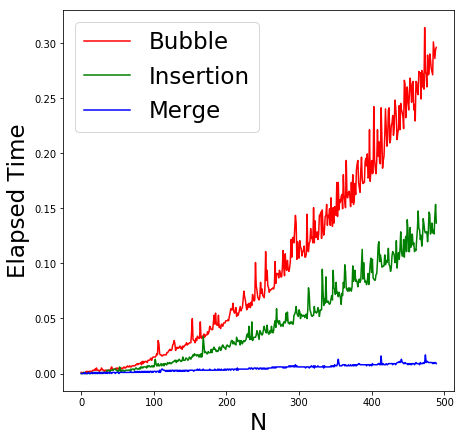

In [6]:
def compute_elapsed_time(func):
    time_hist=[]
    for N in range(10, 500):
        a=0
        c=mySort.__gen_coords__(N)
        start = time()
        func(c)
        end = time()
        a=(end-start)
        time_hist.append(a)
    return time_hist

plt.figure(figsize=(7,7))
plt.xlabel('N', fontsize=23)
plt.ylabel('Elapsed Time', fontsize=23)

# It will take at most 3 minutes
plt.plot(compute_elapsed_time(mySort.bubble_sort), c='r',label='Bubble')
plt.plot(compute_elapsed_time(mySort.insert_sort), c='g',label='Insertion')
plt.plot(compute_elapsed_time(mySort.merge_sort), c='b',label='Merge')
plt.legend(fontsize=23)

### Description:

* numpy 하의 요소들을 정렬한다.
    * 요소를 통으로 순서를 바뀌는 것이 불가능하므로 요소의 x좌표와 y좌표를 각각 바꾸어야 한다.
    
    
* bubble sort
    * current의 값과 current 다음에 오는 값을 비교하여 정렬하는 것을 n번 반복한다.
    * coordinate의 x좌표를 먼저 비교하고 y좌표를 비교한다.
        * x좌표가 같을 때에만 y좌표의 비교를 시행한다.
* insertion sort
    * 정렬된 부분과 안된 부분으로 나누어 정렬되지 않은 부분의 첫 번째 요소를 정렬된 부분의 순서에 맞추어 insert 한다.
    * 역시 x좌표를 먼저 비교하고 그 둘이 같을 때에만 y좌표를 비교한다.
* merge sort
    * 주어진 요소를 절반씩으로 계속 분할하여 가장 작은 단위부터 다시 정렬한다.
    * recursion을 이용하여 가장 작은 단위가 될때까지 분할한다.
    * 요소 별 비교 및 정렬은 지금까지와 같이  x좌표를 먼저 비교하고 그 둘이 같을 때에만 y좌표를 비교한다.
    
    
* compute_elapsed_time
    * 함수를 입력받아 numpy의 값이 random으로 주어질 때 이를 입력받은 함수로 sorting하는데 걸리는 시간을 list로 return한다.
    * gen_coords를 이용하여 길이 N의 정렬할 numpy를 random하게 생성한다.
    * 함수 시작하기 전 시간을 start에, 끝나고의 시간을 end에 저장하고 둘의 차를 구해 list time_hist에 append한다.

---------------

### PROBLEM III: Sorting II (40 Points)

Given $\texttt{Doubly Linked List(DLL)}$ (you already implemented in HW3) containing $\underline{N}$ Nodes, 
<br> You want to SORT Nodes which contain strings in $\texttt{dictionary}$ order. 
<br> Moreover, Uppercase letters always precede Lowercase letters. 
<br>
<br>
> For example, given $\texttt{DLL}$ containing ['ahi'] - ['A'] - ['bc'] - ['BD']
<br> $\rightarrow$ ['A'] - ['BD'] - ['ahi'] - ['bc']


<br>
<br>

To this end, 
- Implement $\texttt{(1) Selection Sort}$ , $\texttt{(2) Shell Sort}$ and $\texttt{(3) Quick Sort}$
- Compare their $\texttt{Complexity}$ by plotting the graphs $\underline{Elapsed\;time}$ versus $\underline{N}$ 
- Discuss your results

<br>
$\mathbf{NOTICE}$ : Do Not Use any pre-built Sorting Library. ( e.g. sorted() or numpy.sort() ) 

**Additional Instructions and Tips**
- Use the given $\texttt{dNode}$ class
- Use the built-in functions of the given $\texttt{DLL}$ class <br> ( e.g. is_empty, size, push_back and print_from_front )
- To begin with, You Should implement $\texttt{search_from_front}$ and $\texttt{compare_string}$

> $\texttt{search_from_front}$ takes 'loc' a certain location $\subset$ [1, self.size()] <br> and outputs dNode at 'loc' and the corresponding data

> $\texttt{compare_string}$ takes two strings and compare them.
<br> It outputs **True** if str2 precedes str1 or str1 is equal to str2, **False** if st1 precedes str2.

- Implement $\texttt{compute_elapsed_time}$ by using $\texttt{reset}$ and $\texttt{gen_str}$

<br>
By using $\texttt{search_from_front}$ and $\texttt{compare_string}$,

- Implement $\texttt{select_sort}$
- Implement $\texttt{shell_sort}$ with $\texttt{gap_insertion_sort}$
- Implement $\texttt{_quick_sort_helper}$ with $\texttt{_partition}$

### Answer:

In [7]:
import numpy as np
import string, random
import matplotlib.pyplot as plt
from time import time

class dNode:
    def __init__(self, init_data):
        self.data = init_data
        self.prev = None
        self.next = None
        
class DLL():
    def __init__(self):
        self.head = dNode(None)
        self.tail = dNode(None)
    def is_empty(self):
        return self.head.next == None
    def size(self):
        if self.is_empty(): return 0
        else:
            current = self.head
            cnt = 0
            while current.next != self.tail:
                cnt += 1
                current = current.next
            return cnt
    def push_back(self, item):
        tmp=dNode(item)
        if self.is_empty():
            self.head.next = tmp
            self.tail.prev = tmp
            tmp.next = self.tail
            tmp.prev = self.head
        else:
            current=self.tail.prev
            self.tail.prev = tmp
            tmp.next = self.tail
            tmp.prev = current
            current.next = tmp
    def print_from_front(self):
        if self.is_empty():
            print('Print Error : The List is empty')
        else:
            current = self.head
            print('Stored data(Foward) : ',end = '')
            while True:
                current = current.next
                if current == self.tail: break
                print(current.data, end=' ')
            print('')
    def search_from_front(self,loc):
        if self.is_empty() or loc > self.size() or loc<=0:
            print('Search Error')
            return None
        else:
            current=self.head
            for i in range(loc):
                current=current.next
            return current
    def compare_string(self, str1, str2):
        a=[i for i in str1]
        b=[j for j in str2]
        fin=False
        k=0
        while k in range(min(len(str1),len(str2))) and fin==False:
            if str1[k]<str2[k]:
                return False
                fin=True
            elif str2[k]<str1[k]:
                return True
                fin=True
            else:
                k+=1
        if fin==False:
            if len(str1)>len(str2):
                return True
            else:
                return False
    def select_sort(self):
        for fill_slot in range(self.size(), 1, -1):
            pos_of_max = 1
            
            for location in range(1, fill_slot + 1):
                if self.search_from_front(location).data > self.search_from_front(pos_of_max).data:
                    pos_of_max = location
                
            last=self.search_from_front(fill_slot)
            pom=self.search_from_front(pos_of_max)
            pom.prev.next=last
            last.next.prev=pom
            if pom.next==last:
                last.prev=pom.prev
                pom.next=last.next
                last.next=pom
                pom.prev=last
            else:
                temp=last.prev
                temp2=pom.next
                pom.next=last.next
                last.next=temp2
                last.prev=pom.prev
                pom.next.prev=pom
                last.next.prev=last
                temp.next=pom
                pom.prev=temp
            
    def shell_sort(self): 
        sublist_count = self.size()//2
        while sublist_count > 0:
            for start_position in range(sublist_count): 
                self.gap_insertion_sort(start_position, sublist_count)
            sublist_count = sublist_count // 2

    def gap_insertion_sort(self, start, gap):
        for i in range(start + gap, self.size(), gap):
            current=self.search_from_front(i+1)
            position = i
        
            while position >= gap and self.search_from_front(position-gap+1).data > current.data:
                compare=self.search_from_front(position-gap+1)
                compare.prev.next=current
                current.next.prev=compare
                if gap!=1:
                    temp=current.prev
                    temp2=compare.next
                    compare.next=current.next
                    current.next=temp2
                    current.prev=compare.prev
                    compare.next.prev=compare
                    current.next.prev=current
                    temp.next=compare
                    compare.prev=temp
                else:
                    current.prev=compare.prev
                    compare.next=current.next
                    current.next=compare
                    compare.prev=current
                position=position-gap 
            
    def quick_sort(self):
        self._quick_sort_helper(1, self.size())
    def _quick_sort_helper(self, first, last):
        if first < last:
            split_point = self._partition(first, last)
            self._quick_sort_helper(first, split_point)
            self._quick_sort_helper(split_point + 1, last)
    def _partition(self, first, last):
        pivot=self.search_from_front(first)
        left_mark = first+1
        right_mark = last
        done = False
        while not done:
            while left_mark <= right_mark and self.compare_string(pivot.data,self.search_from_front(left_mark).data):
                left_mark = left_mark + 1
            while self.compare_string(self.search_from_front(right_mark).data,pivot.data) and right_mark >= left_mark:
                right_mark = right_mark - 1
            if right_mark < left_mark: 
                done = True
            else:
                rm=self.search_from_front(right_mark)
                lm=self.search_from_front(left_mark)
                lm.prev.next=rm
                rm.next.prev=lm
                if lm.next!=rm:
                    temp=rm.prev
                    temp2=lm.next
                    lm.next=rm.next
                    rm.next=temp2
                    rm.prev=lm.prev
                    lm.next.prev=lm
                    rm.next.prev=rm
                    temp.next=lm
                    lm.prev=temp
                else:
                    rm.prev=lm.prev
                    lm.next=rm.next
                    rm.next=lm
                    lm.prev=rm
                temp=left_mark
                left_mark=right_mark
                right_mark=temp
        
        rm=self.search_from_front(right_mark)
        if rm.data==None:
            return right_mark
        else:
            pivot.prev.next=rm
            rm.next.prev=pivot
            if pivot.next!=rm:
                temp=rm.prev
                temp2=pivot.next
                pivot.next=rm.next
                rm.next=temp2
                rm.prev=pivot.prev
                pivot.prev=temp
                pivot.prev.next=pivot
                pivot.next.prev=pivot
                rm.next.prev=rm
            else:
                rm.prev=pivot.prev
                pivot.next=rm.next
                rm.next=pivot
                pivot.prev=rm
            return right_mark
    
    def __reset__(self):
        self.head=dNode(None)
        self.tail=dNode(None)
    def __gen_str__(self, N):
        self.__reset__()
        letters = string.ascii_letters
        for i in range(N):
            self.push_back(''.join(random.choice(letters) for i in range(5)))
    def compute_elapsed_time(self, sort_name):
        time_hist=[]
        for N in range(10, 150):
            a=0
            self.__gen_str__(N)
            start = time()
            if sort_name=='select':
                self.select_sort()
            elif sort_name=='shell':
                self.shell_sort()
            elif sort_name=='quick':
                self.quick_sort()
            end = time()
            a=(end-start)
            time_hist.append(a)
        return time_hist

Stored data(Foward) : redvelvet TWICE twice iu 
Stored data(Foward) : TWICE iu redvelvet twice 

Stored data(Foward) : redvelvet TWICE twice iu 
Stored data(Foward) : TWICE iu redvelvet twice 

Stored data(Foward) : redvelvet TWICE twice iu 
Stored data(Foward) : TWICE iu redvelvet twice 



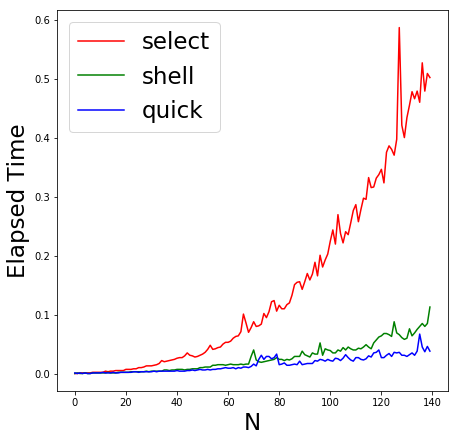

In [12]:
# Sanity Check
myDLL = DLL()
myDLL.push_back('redvelvet')
myDLL.push_back('TWICE')
myDLL.push_back('twice')
myDLL.push_back('iu')
myDLL.print_from_front()
myDLL.select_sort()
myDLL.print_from_front()
print()
myDLL = DLL()
myDLL.push_back('redvelvet')
myDLL.push_back('TWICE')
myDLL.push_back('twice')
myDLL.push_back('iu')
myDLL.print_from_front()
myDLL.shell_sort()
myDLL.print_from_front()
print()
myDLL = DLL()
myDLL.push_back('redvelvet')
myDLL.push_back('TWICE')
myDLL.push_back('twice')
myDLL.push_back('iu')
myDLL.print_from_front()
myDLL.quick_sort()
myDLL.print_from_front()
print()


plt.figure(figsize=(7,7))
plt.xlabel('N', fontsize=23)
plt.ylabel('Elapsed Time', fontsize=23)

# It will take at most 3 minutes 
plt.plot(myDLL.compute_elapsed_time('select'), c='r',label='select')
plt.plot(myDLL.compute_elapsed_time('shell'), c='g',label='shell')
plt.plot(myDLL.compute_elapsed_time('quick'), c='b',label='quick')
plt.legend(fontsize=23)

### Description:

* Double Linked List로 주어진 자료의 정렬
    * Node의 data만 바꾸는 것이 아닌 Node의 prev, next를 바꾸어 정렬한다.
    * 순서를 바꿀 두 Node가 바로 앞뒤로 정렬되어 있을 때 순서를 바꾸는 중 오류가 나는 것을 확인하여 이 경우를 if문으로 분리하여 처리하였다.




* search_from_front
    * 입력받은 loc의 node를 return한다.
    * 반복문을 이용하여 current를 self.head에서 시작하여 next를 이용, 목표 node까지 이동한다.
* compare_string
    * str1, str2를 받아 각각의 n번째 문자를 비교한다.
    * 문자를 부등호로 비교하면 아즈키 코드로 비교하므로 이를 이용한다.
    * 사전식 정렬을 따르므로 짧은 문자열의 마지막 문자까지 비교하여 같으면 짧은 문자열이 긴 문자열보다 앞 순서이다.
    * True/False를 return한다.




* selection sort
    * n번째 시행시, 첫번째 요소부터 뒤에서 n번째 요소까지 중 가장 큰 것을 뒤에서 n번째 요소와 순서를 바꾼다.
    * search_from_front를 이용하므로 반복문에서 range를 이용하여 i의 값이 1씩 작아지도록 하고 이를 이용한다.
* shell sort
    * gap을 설정하고 gap_insertion_sort를 이용하여 gap씩 뛰어넘어 존재하는 요소들을 각각 정렬한 후 다시 정렬하면 gap 사이를 다시 정렬한다.
    * 반복문과 gap_insertion_sort를 사용하여 gap을 절반으로 줄여 다시 gap_insertion_sort를 시행하여 정렬한다.
* quick sort
    * pivot, right mark, left mark를 이용하여 정렬한다.
        * pivot과 right mark, pivot과 left mark를 각각 비교하여 data 전체에서 pivot의 최종 위치를 찾아 배열한다.
        * 정렬된 pivot의 양쪽에서 각각 새로운 pivot을 잡아 이를 반복한다.
    * 정렬할 전체 구간을 quick_sort_helper에 넣는다.
    * quick_sort_helper: 정렬할 data의 구간을 받아 partition에 넣어 구간의 첫번째 요소인 pivot을 구간에서 알맞은 위치에 정렬하고, pivot 기준으로 양쪽을 각각 다른 구간으로 잡아 재귀함수로 시행한다.
    * partition: 입력 받은 구간의 첫번째 요소인 pivot을 구간에서 알맞은 위치에 오게 하며, 그 위치를 return한다.
        * left mark의 data 값이 pivot의 data 값보다 클 때까지 left mark를 오른쪽으로 이동한다.
        * right mark의 data값이 pivot의 data 값보다 작을 때까지 right mark를 왼쪽으로 이동한다.
        * left mark와 right mark의 순서를 바꾼다.
        * left mark가 right mark보다 오른쪽에 있을 때, right mark가 구간에서의 pivot의 최종 위치가 된다.
        * 따라서 right mark와 pivot의 순서를 바꾸고, 이 위치를 return한다.
        
        
        
* compute_elapsed_time
    * 시행할 함수의 이름을 받아 if문으로 그에 맞는 함수를 시행한다.
    * gen_str을 이용해 random한 5자짜리 string을 data로 갖는 Node를 10개부터 150개까지 갖는 DLL을 생성한다.
    * 함수 시작하기 전 시간을 start에, 끝나고의 시간을 end에 저장하고 둘의 차를 구해 list time_hist에 append한다.

---------------